# Feature Engineering

## Imports


In [9]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### First party modules


In [10]:
# Get the project root
ROOT_DIR = Path.cwd().parent
sys.path.append(str(ROOT_DIR))

In [11]:
from scripts.data_wrangling import concat_csv_files  # type: ignore
from src.data import filter_by_date_range, make_date_columns  # type: ignore

### Optional packages

In [12]:
try:
    from catppuccin import PALETTE  # Just for aesthetic proposes
    catppuccin_imported = True
except ImportError:
    print("The catppuccin package is not installed, no matter :), plots will use the default visual configuration.")
    catppuccin_imported = False

In [13]:
if catppuccin_imported:
    # Choose a flavor (latte, frappe, macchiato, mocha)
    flavor = PALETTE.mocha

    # Extract colors as hex values in a dict for easy access
    colors = {
        color.name.lower().replace(" ", "_"): color.hex for color in flavor.colors
    }

    # Define color cycle for plots (select the colors you want to use)
    color_cycle = [
        colors["blue"],
        colors["pink"],
        colors["green"],
        colors["yellow"],
        colors["red"],
        colors["teal"],
        colors["peach"],
        colors["mauve"],
        colors["lavender"],
    ]

    # Configure matplotlib
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=color_cycle)
    plt.rcParams["axes.facecolor"] = "white"  # Set axes background to white
    plt.rcParams["figure.facecolor"] = "white"  # Set figure background to white
    plt.rcParams["text.color"] = colors["text"]
    plt.rcParams["axes.labelcolor"] = colors["text"]
    plt.rcParams["xtick.color"] = colors["subtext_1"]
    plt.rcParams["ytick.color"] = colors["subtext_1"]
    plt.rcParams["axes.edgecolor"] = colors["surface_2"]
    plt.rcParams["grid.color"] = colors["surface_0"]  # Catppuccin white for grid

    # Configure seaborn
    sns.set_palette(color_cycle)
    sns.set_style(
        {
            "axes.facecolor": colors["mantle"],  # Set axes background to white
            "figure.facecolor": colors["mantle"],  # Set figure background to white
            "text.color": colors["text"],
            "axes.labelcolor": colors["text"],
            "xtick.color": colors["subtext_1"],
            "ytick.color": colors["subtext_1"],
            "axes.edgecolor": colors["surface_2"],
            "grid.color": colors["surface_0"],  # Catppuccin white for grid
        },
    )


else:
    sns.set_theme(style="darkgrid")

In [14]:
{
    "rosewater": "#f5e0dc",
    "flamingo": "#f2cdcd",
    "pink": "#f5c2e7",
    "mauve": "#cba6f7",
    "red": "#f38ba8",
    "maroon": "#eba0ac",
    "peach": "#fab387",
    "yellow": "#f9e2af",
    "green": "#a6e3a1",
    "teal": "#94e2d5",
    "sky": "#89dceb",
    "sapphire": "#74c7ec",
    "blue": "#89b4fa",
    "lavender": "#b4befe",
    "text": "#cdd6f4",
    "subtext_1": "#bac2de",
    "subtext_0": "#a6adc8",
    "overlay_2": "#9399b2",
    "overlay_1": "#7f849c",
    "overlay_0": "#6c7086",
    "surface_2": "#585b70",
    "surface_1": "#45475a",
    "surface_0": "#313244",
    "base": "#1e1e2e",
    "mantle": "#181825",
    "crust": "#11111b",
}

{'rosewater': '#f5e0dc',
 'flamingo': '#f2cdcd',
 'pink': '#f5c2e7',
 'mauve': '#cba6f7',
 'red': '#f38ba8',
 'maroon': '#eba0ac',
 'peach': '#fab387',
 'yellow': '#f9e2af',
 'green': '#a6e3a1',
 'teal': '#94e2d5',
 'sky': '#89dceb',
 'sapphire': '#74c7ec',
 'blue': '#89b4fa',
 'lavender': '#b4befe',
 'text': '#cdd6f4',
 'subtext_1': '#bac2de',
 'subtext_0': '#a6adc8',
 'overlay_2': '#9399b2',
 'overlay_1': '#7f849c',
 'overlay_0': '#6c7086',
 'surface_2': '#585b70',
 'surface_1': '#45475a',
 'surface_0': '#313244',
 'base': '#1e1e2e',
 'mantle': '#181825',
 'crust': '#11111b'}

## Load Data

In [53]:
# Change for "../data/raw/daily_energy_production.csv" for a classic path
raw_data_directory = ROOT_DIR / "data" / "raw"
processed_data_directory = ROOT_DIR / "data" / "processed"

demand_path = raw_data_directory / "hourly_demand.csv"
sample_month_path = processed_data_directory / "csv_files" / "2024-12.csv"
historic_hourly_path = processed_data_directory / "generation_historic_subtipo.csv"
historic_hourly_tipo_path = processed_data_directory / "generation_historic_tipo.csv"
historic_daily_path = raw_data_directory / "daily_energy_production.csv"

demand = pd.read_csv(demand_path)
sample_month = pd.read_csv(sample_month_path)
historic = pd.read_csv(historic_hourly_path)
historic_tipo = pd.read_csv(historic_hourly_tipo_path)
historic_daily = pd.read_csv(historic_daily_path)

In [54]:
demand["demanda"] = pd.to_numeric(demand["demanda"].str.replace(",", "."))

## Data featuring

### Technologies

In [105]:
formatted_hourly = historic.copy()
formatted_hourly["hidraulica"] = formatted_hourly["pasada"] + formatted_hourly["embalse"]
# formatted_hourly["solar"] = formatted_hourly["solar"] + formatted_hourly["termosolar"]

formatted_hourly = formatted_hourly.drop(columns=["embalse", "pasada", "termosolar", "hora_opreal", "termica"])

In [106]:
columns_map_rename = {
    "bess": "Almacenamiento_Bateria",
    "biogas": "BioGas",
    "biomasa": "Biomasa",
    "carbon": "Carbon",
    "cogeneracion": "Cogeneracion",
    "diesel": "Diesel",
    "eolica": "Eolica",
    "fuel-oil": "Fuel Oil",
    "gas-natural": "Gas_Natural",
    "geotermica": "Geotermica",
    "pet-coke": "PetCoke",
    "solar": "Solar",
    "fecha_opreal": "Date",
    "hidraulica": "Hidraulica",
}

In [107]:
formatted_hourly = formatted_hourly.rename(columns=columns_map_rename)

In [108]:
# formatted_hourly = formatted_hourly.groupby("Date").sum().reset_index()
formatted_hourly["Date"] = pd.to_datetime(formatted_hourly["Date"])

In [99]:
formatted_hourly.describe()

,Date,Almacenamiento_Bateria,BioGas,Biomasa,Carbon,Cogeneracion,Diesel,Eolica,Fuel Oil,Gas_Natural,Geotermica,PetCoke,Solar,Hidraulica
count,1942,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,2022-08-28 11:59:59.999999744,0.019490,422.112232,4910.560108,53954.763461,987.603467,2389.444204,23846.791356,33.766043,39476.373101,941.399729,939.313852,38759.698671,59171.698470
min,2020-01-01 00:00:00,0.000000,64.682600,1919.512455,4959.317464,0.000000,0.004042,3259.179368,0.000000,309.500000,0.000000,0.000000,8538.948638,21798.295985
25%,2021-04-30 06:00:00,0.000000,390.742809,4373.293128,34855.840258,514.842500,173.959131,16074.294211,0.000000,29719.391464,694.404800,880.375000,26732.104539,44087.460044
50%,2022-08-28 12:00:00,0.000000,430.628815,4914.462046,53086.533100,884.995000,756.101057,22835.482822,0.000000,40720.791032,956.465600,1142.250000,39218.199048,56160.459514
75%,2023-12-26 18:00:00,0.000000,473.345401,5470.611950,71133.303925,1225.797500,2832.906620,30897.164376,0.000000,49291.812774,1174.082500,1217.500000,49425.999776,76605.536324
max,2025-04-25 00:00:00,2.560000,592.445360,7150.152351,102640.256900,3899.420000,33838.847466,65934.106931,1694.795042,79822.438606,2308.703800,1323.000000,77695.162791,105917.029822
std,NaN,0.188662,80.668926,800.145543,20906.363988,607.454701,4092.186034,10037.975298,131.379204,14748.708075,356.113476,431.010201,14646.966123,19776.584889


In [41]:
numeric_cols_1 = historic.select_dtypes(include=np.number).columns
numeric_cols_2 = historic_daily.select_dtypes(include=np.number).columns

In [42]:
historic["total"] = historic[numeric_cols_1].sum(axis=1)
historic_daily["total"] = historic_daily[numeric_cols_2].sum(axis=1)

In [43]:
temp_df_1 = historic.groupby("fecha_opreal")["total"].sum().reset_index()
temp_df_1["fecha_opreal"] = pd.to_datetime(temp_df_1["fecha_opreal"])

In [44]:
temp_df_2 = historic_daily.groupby("Date")["total"].sum().reset_index()
temp_df_2["fecha_opreal"] = pd.to_datetime(temp_df_2["Date"])

In [45]:
temp_df_3 = demand.groupby("fecha")["demanda"].sum().reset_index()
temp_df_3["fecha_opreal"] = pd.to_datetime(temp_df_3["fecha"])

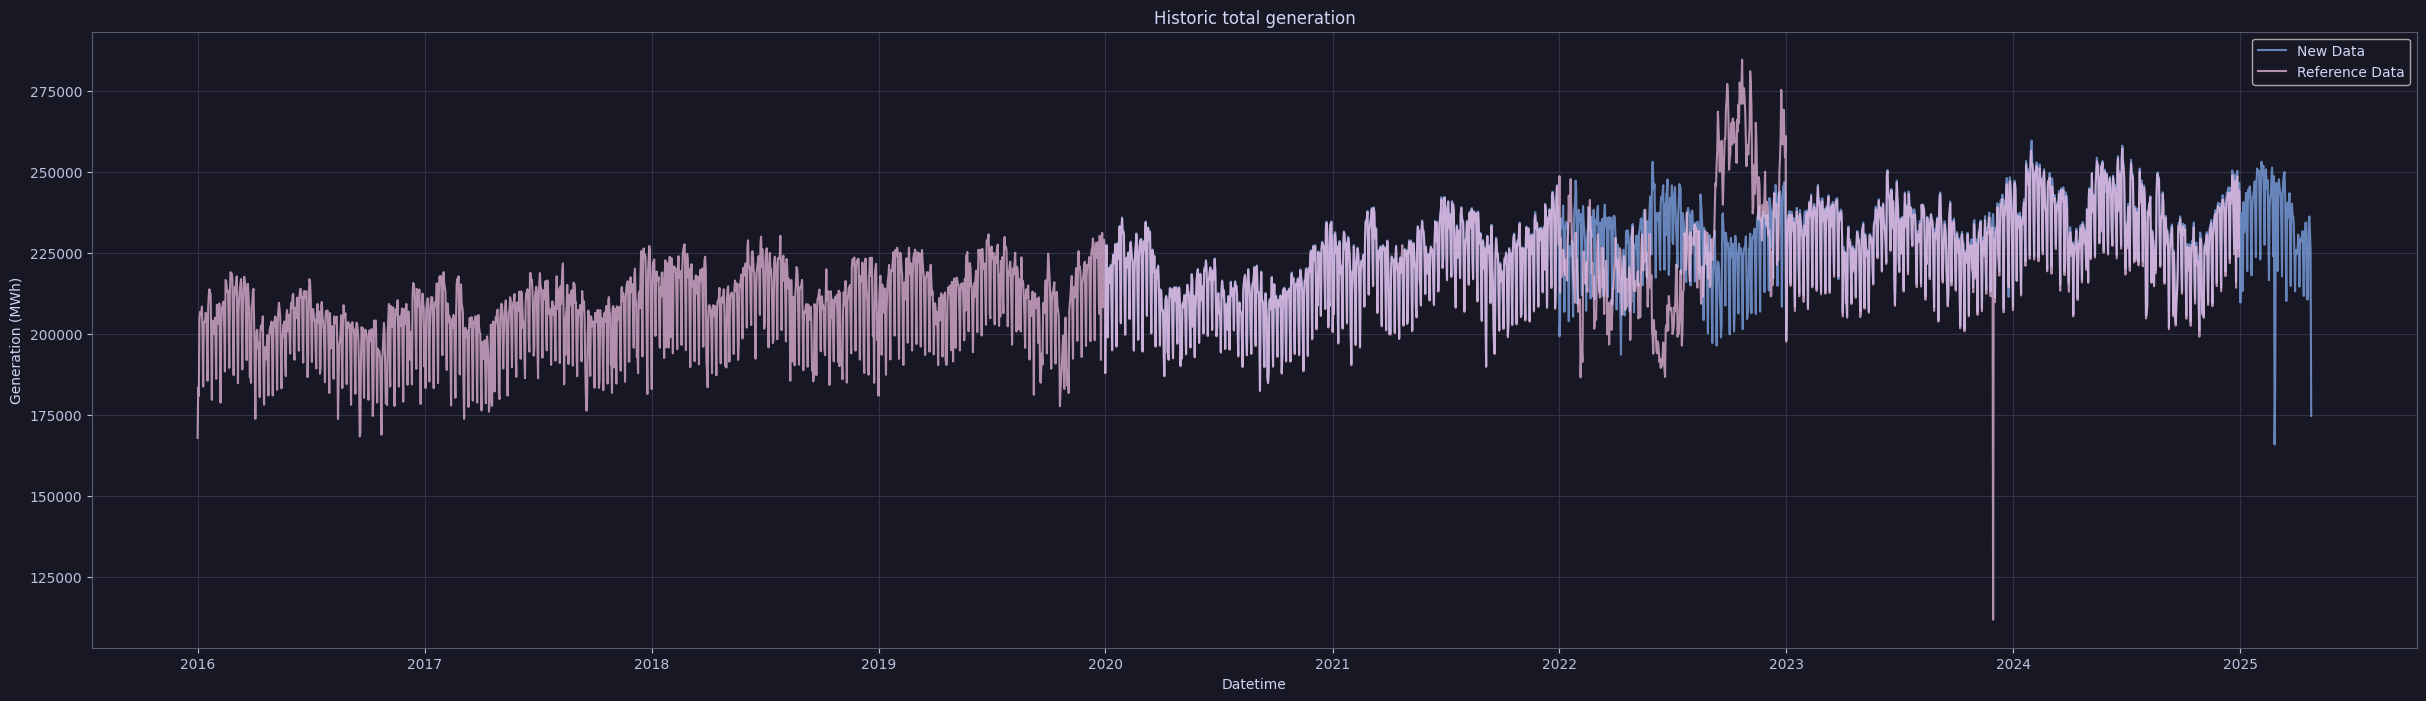

In [46]:
fig, ax1 = plt.subplots(figsize=(30, 8), sharex=True)

# Plot the lineplot on the first subplot
sns.lineplot(
    temp_df_1,
    x="fecha_opreal",
    y="total",
    ax=ax1,
    alpha=0.7,
    label="New Data",
)

sns.lineplot(
    temp_df_2,
    x="fecha_opreal",
    y="total",
    ax=ax1,
    alpha=0.7,
    label="Reference Data",
)

# sns.lineplot(
#     temp_df_3,
#     x="fecha_opreal",
#     y="demanda",
#     ax=ax1,
#     alpha=0.4,
#     label="Demand",
# )
ax1.set_xlabel("Datetime")
ax1.set_ylabel("Generation (MWh)")
ax1.set_title("Historic total generation")
ax1.legend(loc="upper right")
ax1.grid(True)

### Historic generation by source

In [47]:
temp_df = historic_tipo.groupby("fecha_opreal").sum().reset_index()
temp_df = temp_df.drop(columns="hora_opreal")
temp_df["fecha_opreal"] = pd.to_datetime(temp_df["fecha_opreal"])

In [48]:
plot_definitions = {
    "solar": {"label": "Solar", "color": colors["yellow"]},
    "eolica": {"label": "Eolica", "color": colors["blue"]},
    "hidraulica": {"label": "Hidraulica", "color": colors["green"]},
    "termica": {"label": "Termica", "color": colors["red"]},
}

In [49]:
def plot_time_series(
    x_col,
    plot_configs,
    ax=None,
    figsize=(16, 6),
    xlabel="Datetime",
    ylabel="Generation (MWh)",
    title="Historic total generation",
    legend_loc="upper right",
    **kwargs,
):
    """Generates a time series line plot for multiple y-variables on a single axis."""
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, sharex=True)

    for y_col, config in plot_configs.items():
        sns.lineplot(
            x=x_col,
            y=y_col,
            ax=ax,
            label=config.get(
                "label", y_col,
            ),  # Default label to y_col name if not provided
            color=config.get("color"),  # sns can auto-assign colors if None
            **kwargs,
        )

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if plot_configs:  # Only show legend if there are plots
        ax.legend(loc=legend_loc)
    ax.grid(True)

    return ax

In [51]:
def plot_technologies(
    df,
    tech_dict,
    x_column="fecha_opreal",
    figsize=(16, 6),
    title="Historic total generation",
    xlabel="Datetime",
    ylabel="Generation (MWh)",
):
    """Create a figure with multiple rows, one for each technology type."""
    # Create subplots based on number of technologies
    n_techs = len(tech_dict)
    fig, axs = plt.subplots(
        n_techs,
        1,
        figsize=(figsize[0], figsize[1] * n_techs),
        sharex=True,
        constrained_layout=True,
    )

    # If only one technology, make axs a list for consistent indexing
    if n_techs == 1:
        axs = [axs]

    # Plot each technology in its own subplot
    for i, (tech_name, tech_info) in enumerate(tech_dict.items()):
        sns.lineplot(
            df,
            x=x_column,
            y=tech_info["column"],
            ax=axs[i],
            alpha=0.8,
            label=tech_name,
            color=tech_info["color"],
        )

        axs[i].set_ylabel(ylabel)
        axs[i].set_title(f"{tech_name} {ylabel}")
        axs[i].legend(loc="upper right")
        axs[i].grid(True)

    # Set the x-label only for the bottom subplot
    axs[-1].set_xlabel(xlabel)

    # Set the overall title
    fig.suptitle(title, fontsize=16)

    return fig, axs

# Alternative usage - all on one plot:
def plot_technologies_single(
    df,
    tech_dict,
    x_column="fecha_opreal",
    figsize=(16, 6),
    title="Historic total generation",
    xlabel="Datetime",
    ylabel="Generation (MWh)",
):
    """Create a single plot with all technologies (replicating the original plot)."""
    fig, ax = plt.subplots(figsize=figsize)

    for tech_name, tech_info in tech_dict.items():
        sns.lineplot(
            df,
            x=x_column,
            y=tech_info["column"],
            ax=ax,
            alpha=0.8,
            label=tech_name,
            color=tech_info["color"],
        )

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc="upper right")
    ax.grid(True)

    return fig, ax

In [81]:
formatted_hourly.columns

Index(['Date', 'Almacenamiento_Bateria', 'BioGas', 'Biomasa', 'Carbon',
       'Cogeneracion', 'Diesel', 'Eolica', 'Fuel Oil', 'Gas_Natural',
       'Geotermica', 'PetCoke', 'Solar', 'Hidraulica'],
      dtype='object')

In [109]:
formatted_hourly.to_csv("historic_hourly_generation.csv")

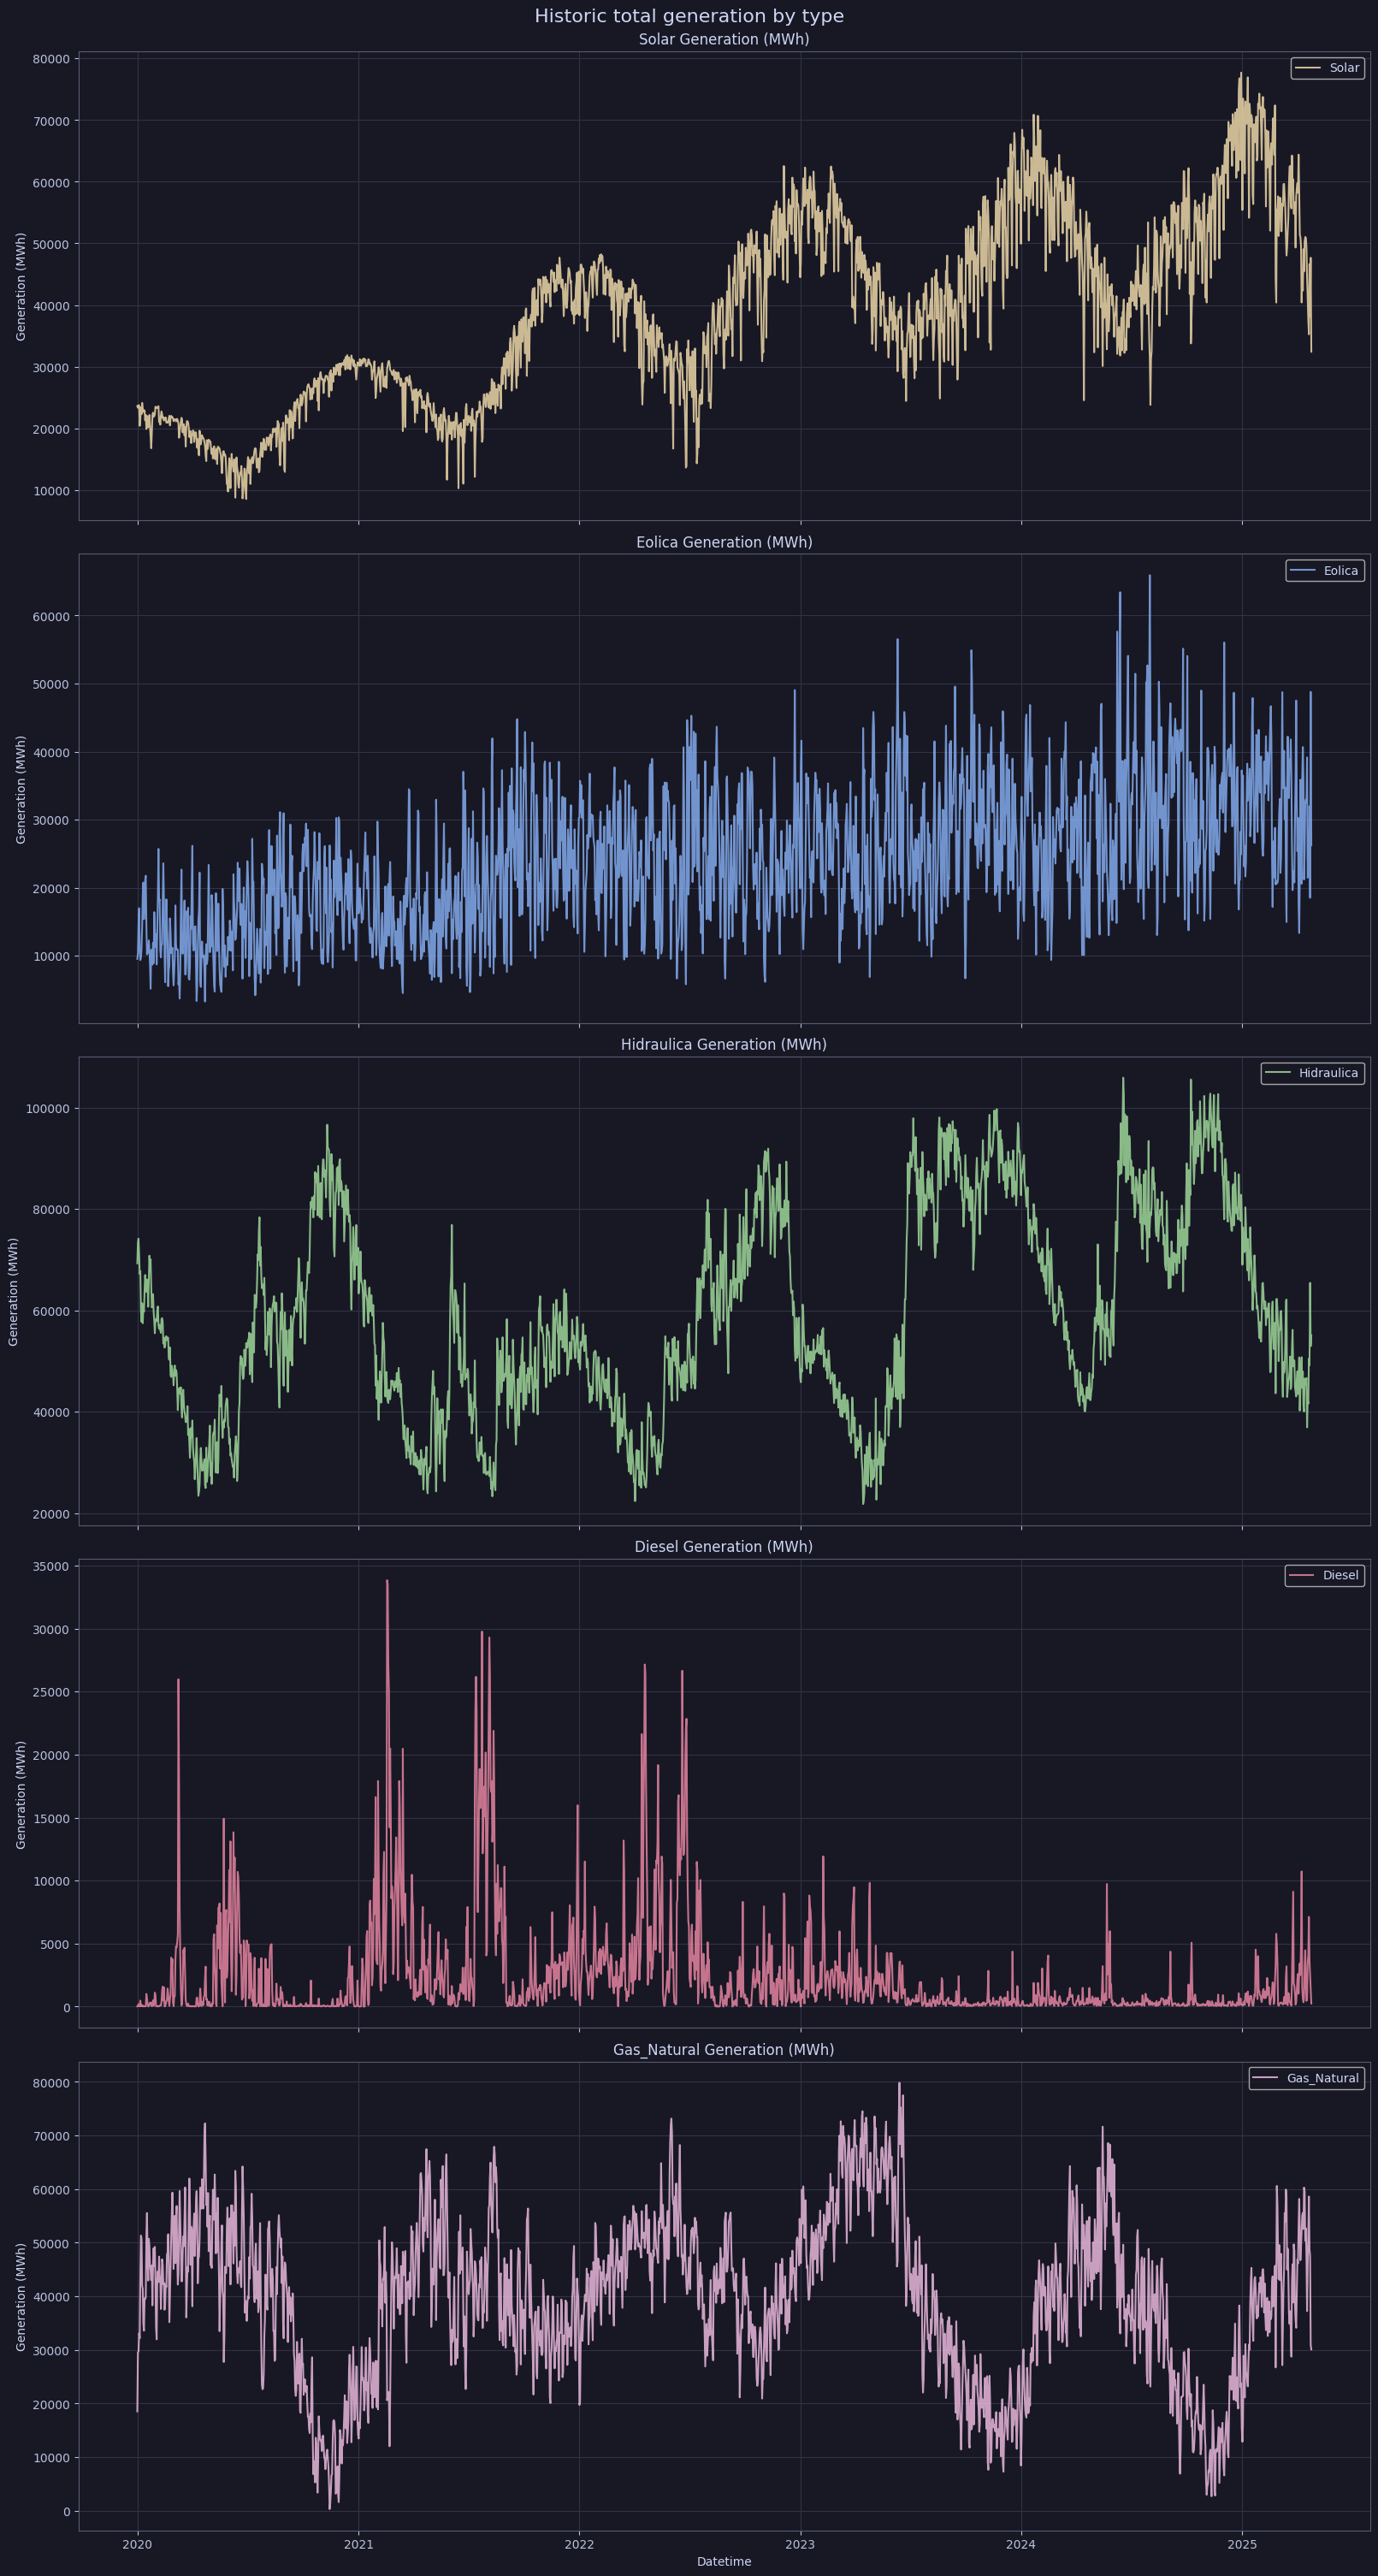

In [100]:
tech_dict = {
    "Solar": {"column": "Solar", "color": colors["yellow"]},
    "Eolica": {"column": "Eolica", "color": colors["blue"]},
    "Hidraulica": {"column": "Hidraulica", "color": colors["green"]},
    "Diesel": {"column": "Diesel", "color": colors["red"]},
    "Gas_Natural": {"column": "Gas_Natural", "color": colors["pink"]},
    # "Termica": {"column": "termica", "color": colors["red"]},
}
fig, axs = plot_technologies(formatted_hourly, tech_dict, title="Historic total generation by type", x_column="Date")
plt.show()

### Actual Data engineering

In [14]:
sample_month['valid_generation'] = np.where(sample_month['generacion_real_mwh'] > 0, 1, np.nan)

In [15]:
temp_df = sample_month.pivot_table(
    index=["fecha_opreal", "hora_opreal"],
    columns="subtipo_nemotecnico",
    values="valid_generation",
    aggfunc="sum",
)

###  Weather

### Frecuency

In [16]:
from scipy.signal import periodogram

In [17]:
demand.columns

Index(['fecha', 'hora', 'demanda'], dtype='object')

In [18]:
f, Pxx = periodogram(x=demand["demanda"])

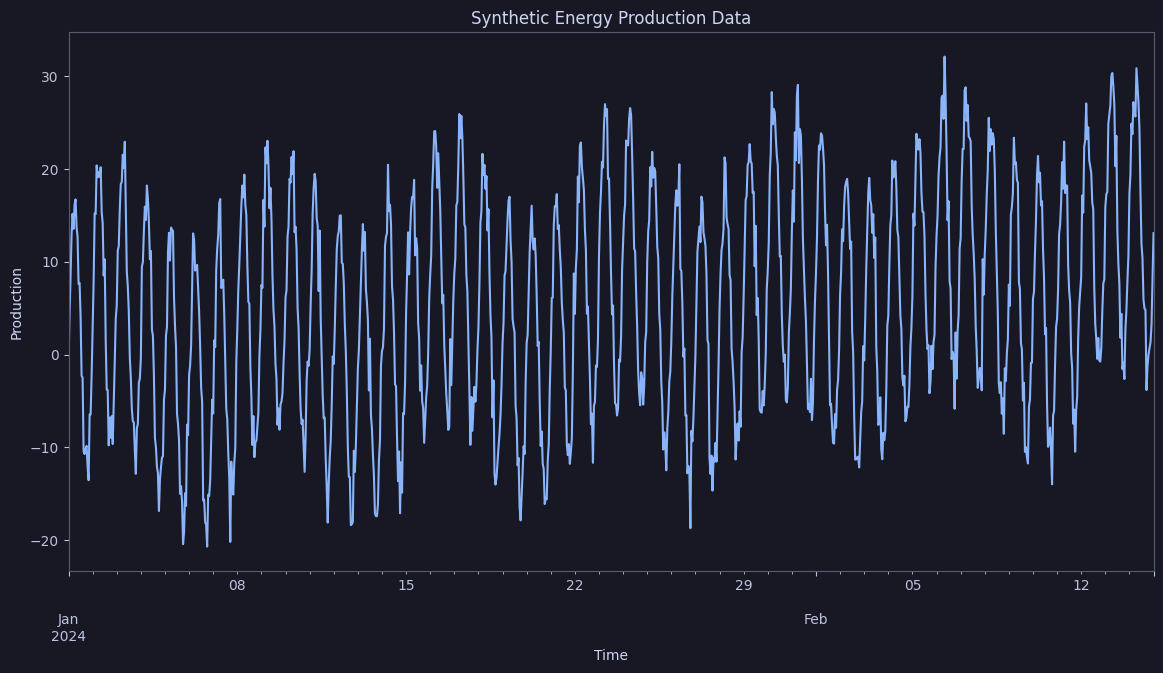


--- ACF and PACF Plots ---


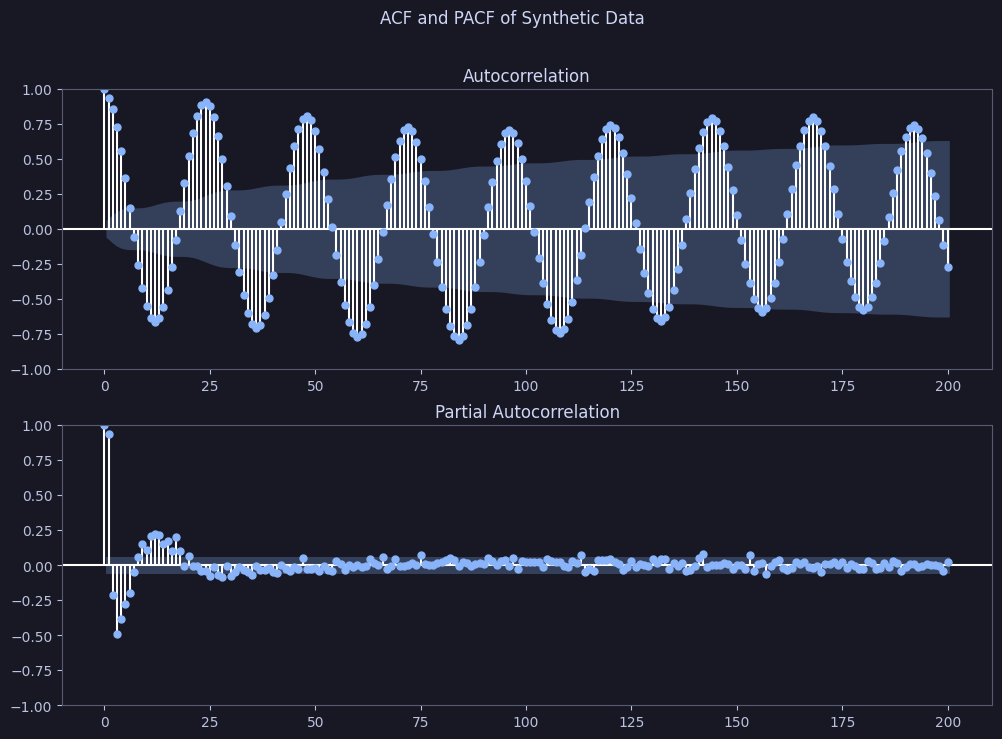


--- Periodogram ---


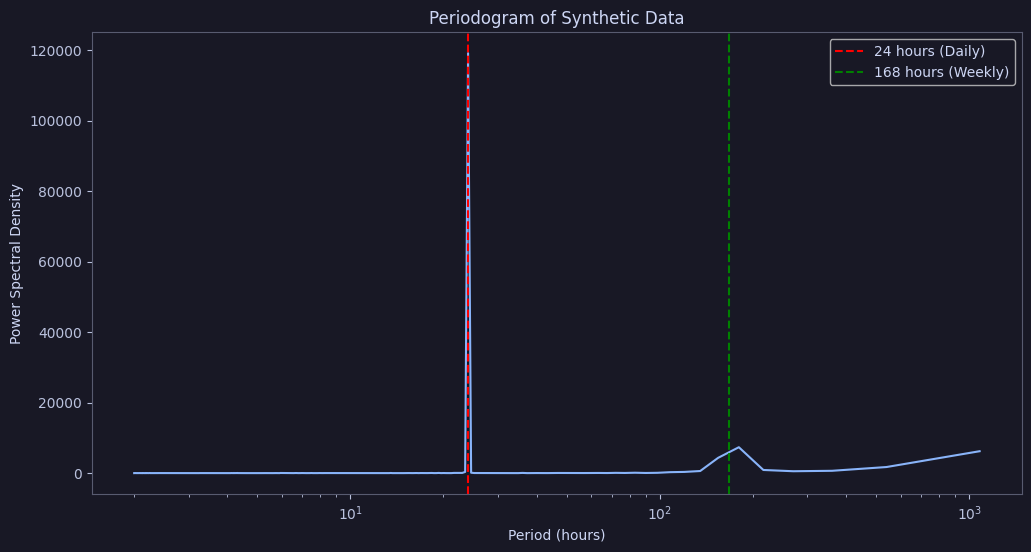


Dominant periods based on periodogram (higher power):
Period: 24.02 hours, Frequency: 0.0416 cycles/hour, Power: 119147.93
Period: 180.17 hours, Frequency: 0.0056 cycles/hour, Power: 7347.46
Period: 1081.00 hours, Frequency: 0.0009 cycles/hour, Power: 6215.10
Period: 154.43 hours, Frequency: 0.0065 cycles/hour, Power: 4336.74
Period: 540.50 hours, Frequency: 0.0019 cycles/hour, Power: 1727.83

--- STL Decomposition (Daily Seasonality) ---


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import STL

# Generate a time index (e.g., hourly data for a few weeks)
rng = pd.date_range(
    start="2024-01-01",
    end="2024-02-15",
    freq="h",
)  # Approx 6 weeks of hourly data
n_points = len(rng)

# Create components:
# 1. Trend
trend = np.linspace(0, 10, n_points)

# 2. Daily seasonality (24 hours)
daily_seasonality = 15 * np.sin(2 * np.pi * np.arange(n_points) / 24)

# 3. Weekly seasonality (24 * 7 = 168 hours)
weekly_seasonality = 5 * np.sin(2 * np.pi * np.arange(n_points) / 168)

# 4. Noise
noise = np.random.normal(0, 2, n_points)

# Combine components
data = trend + daily_seasonality + weekly_seasonality + noise

# Create pandas Series
series = pd.Series(data, index=rng, name="EnergyProduction")

# --- Plot the generated series ---
plt.figure(figsize=(14, 7))
series.plot(title="Synthetic Energy Production Data")
plt.ylabel("Production")
plt.xlabel("Time")
plt.show()

# --- Now apply the detection methods ---

# 1. ACF/PACF
print("\n--- ACF and PACF Plots ---")
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series, lags=200, ax=ax[0])  # Lags up to ~8 days (24*8 = 192)
plot_pacf(series, lags=200, ax=ax[1])
plt.suptitle("ACF and PACF of Synthetic Data")
plt.show()

# 2. Periodogram (using SciPy)
print("\n--- Periodogram ---")
# The frequency is in cycles per unit of time.
# If your data is hourly, frequency 1/24 corresponds to a daily cycle.
# Frequency 1/168 corresponds to a weekly cycle.
frequencies, spectrum = periodogram(series, fs=1)  # fs=1 means 1 sample per hour
plt.figure(figsize=(12, 6))
plt.plot(
    1 / frequencies[1:], spectrum[1:]
)  # Plot period (1/frequency) vs spectrum, skip DC component
plt.xscale("log")  # Often helpful to see different scales of periods
plt.xlabel("Period (hours)")
plt.ylabel("Power Spectral Density")
plt.title("Periodogram of Synthetic Data")
# Add vertical lines for expected periods
plt.axvline(24, color="red", linestyle="--", label="24 hours (Daily)")
plt.axvline(168, color="green", linestyle="--", label="168 hours (Weekly)")
plt.legend()
plt.show()

# Highlight dominant frequencies
print("\nDominant periods based on periodogram (higher power):")
sorted_indices = np.argsort(spectrum[1:])[::-1]  # Sort by power, skip DC
for i in range(5):  # Print top 5
    idx = sorted_indices[i]
    freq = frequencies[idx + 1]
    period = 1 / freq
    power = spectrum[idx + 1]
    print(
        f"Period: {period:.2f} hours, Frequency: {freq:.4f} cycles/hour, Power: {power:.2f}"
    )


# 3. STL Decomposition
# For STL, you typically need to specify the main seasonal period you expect.
# Let's first assume we want to isolate the daily seasonality.
print("\n--- STL Decomposition (Daily Seasonality) ---")
stl_daily = STL(
    series, seasonal=24 + 1
)  # seasonal parameter should be odd, so 24+1=25 for daily
# The 'seasonal' parameter in STL is the length of the seasonal smoother.
# It must be odd and is typically chosen based on the primary suspected seasonal period.
# For hourly data and daily seasonality, a common choice is 24*k + 1, where k is small.
# If you suspect a strong 24-hour cycle, seasonal=25 is a good start.
# Or seasonal=seasonal_strength, where seasonal_strength is an odd integer.
# For hourly data with daily seasonality, often seasonal=24*N+1 for some N, like seasonal=25 or seasonal=49.
# Here, `seasonal=25` (assuming we are looking for a period of 24).
# The 'period' argument is the one that directly specifies the periodicity.
# If not specified, it's inferred from the index.
# However, for `STL`, the key parameter is `seasonal` (length of seasonal smoother, must be odd).
# We are looking for a period of 24. `seasonal` should be an odd integer >= 7.
# A common choice is `seasonal = period + (1 if period % 2 == 0 else 0)` or slightly larger.
# For a period of 24, `seasonal=25` or `seasonal=35` (as in Rob Hyndman's examples) are often